In [791]:
import pandas as pd
import numpy as np
import string
import Levenshtein as lev
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

# Punto 1. Limpieza y transformación de los datos

### 1. Extracción de base datos

In [772]:
dataSource = "data/DataAnalyst_YoFio_PT_ocupaciones.csv"
data=pd.read_csv(dataSource)

### 2. Revisión de la consistencia de la base de datos

In [773]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Empleos  560 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [774]:
data=data.astype("string")

### 3. Normalización a minúsculas

In [775]:
data.Empleos=data.Empleos.apply(lambda x: x.lower())

### 4. Eliminación de puntuación y caracteres especiales

In [776]:
caracteresEspeciales=str.maketrans('áéíóú','aeiou',string.punctuation)
data.Empleos = data.Empleos.apply(lambda empleo: empleo.translate(caracteresEspeciales))

### 5. Separar por espacios

In [777]:
data.Empleos=data.Empleos.apply(str.split)

### 6. Eliminación de palabras con poco significado

In [778]:
preposiciones = ['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por', 'segun', 'sin', 'so', 'sobre', 'tras', 'durante', 'mediante', 'versus','via']
conjunciones = ['y', 'e', 'ni', 'que', 'pero', 'mas', 'aunque', 'sino', 'siquiera', 'o', 'u', 'ora', 'sea', 'bien']
otras = ['soy', 'una', 'uno','la', 'el', 'los']
palabrasPocoSignificado=preposiciones + conjunciones + otras

In [779]:
def Eliminar_Palabras(listaDePalabras, palabrasParaEliminar=palabrasPocoSignificado):
    for indice, palabra in enumerate(listaDePalabras):
        if palabra in palabrasParaEliminar:
            listaDePalabras.pop(indice)

data.Empleos.apply(lambda empleos: Eliminar_Palabras(empleos));

### 7. Definición de grupos y reclasificación

In [780]:
grupos={'empleado': ['empleado','empleada','trabajador','obrero', 'tecnico', 'coordinador', 'operador', 'trabajo','supervisor',
                    'servidor', 'ayudante', 'auxiliar', 'mesero', 'promotor', 'despachador', 'demostrador',
                    'maniobrista','verificador','encargado','analista','sectretaria', 'montacarguista'
                    'instalador','oficina','fabrica','soporte','comisionista','montacarguista','maquilador','conserje',
                    'almacenista','telemarketer','telemarketing','callcenter','hoteleria','recepcionista',
                    'mantenimiento','intencencia','limpieza','aseo','reclutador','logistica','cuidador','reclutamiento',
                    'marketing','hostest','cafeteria','carpinteria','rosticeria','capturista','gasolinera','ajustador',
                    'autolavado','servicio','call','center','camarista','monirotista','aplicador','repartidor','paqueteria',
                    'cajero','mensajero','agente','checador','aseador','rh','rrhh','coordinacion'],
        'vendedor': ['vendedor', 'ventas', 'venta'], 
        'chofer':['chofer','uber', 'didi', 'taxi', 'taxsista', 'conductor','transportista','transporte','bicitaxi',
                 'trailero'],
        'salud': ['doctor','medico','enfermera','cirgujano','dentista','odontologo','camillero','radiologo',
                  'terapeuta','trasladista','clinico','preventista'],
        'comerciante':['comerciante','comercio', 'vendo'],
        'hogar':['hogar','ama', 'casa'],
        'oficio':['oficio','mecanico','electricista','albañil','vidriero','reposteria','carrocero','electrico', 'carnicero',
                 'hojalatero', 'cocinero', 'chef', 'zapatero','panadero','pizzero','estilista','maquillista',
                 'albañileria','herreria','tapicero','jardinero','costurero','sastre','construccion','repartidor',
                 'taller','pirotecnia','verdulero','estetica','fotografo','fotografia','manualidades','tatuador',
                 'reparacion','reparador','pastelero','repostero','afinador','banquetero','soldador','ebanista',
                 'entenador','automotriz','taquero'],
        'profesionista':['ingeniero', 'abogado','contador', 'licenciado','contabilidad', 'arquitecto', 'veterinario',
                        'metrologo','auditor','programador','contratista','mercadologo','profesionisnta','diseñador',
                        'diseño'],
        'ejecutivo':['ejecutivo','gerente', 'administrador', 'finanzas','jefe','administrativo','administracion'],
        'empresario':['empresario','tienda','negocio','locatario','empresa'],
        'seguridad':['seguridad', 'guardia', 'policia','custodia','vigilante','velador'],
        'jubilado':['jubilado', 'pensionado'],
        'independiente':['independiente','freelance','emprendedor'],
        'docente':['docente','profesor','maestro', 'instructor'],
        'consultor':['consultor', 'asesor'],
        'desempleado':['desempleado']
       }

In [781]:
def Clasificador_Empleo(listaPalabras, diccionarioGrupos=grupos, precision=3):
    for palabra in listaPalabras:
        for grupo in list(diccionarioGrupos.keys()):
            for elemento in diccionarioGrupos[grupo]:
                distancia=lev.distance(palabra,elemento)
                if distancia < precision:
                    return grupo
    return 'otro' #str(listaPalabras)

In [782]:
data['EmpleoClasificado']=''
data.EmpleoClasificado=data.Empleos.apply(lambda empleo: Clasificador_Empleo(empleo))
data=data.drop(['Empleos'], axis =1)
data.rename(columns={'EmpleoClasificado':'Empleos'}, inplace =True)

### 8. Guardado de base de datos en un archivo

In [766]:
data.to_csv('data/Resultado_Clasificacion_ocupaciones.csv')

### Como punto adicional he generado una nube de palabras para visualizar la clasificación de ocupaciones de manera general. Este punto no se encuentra en el código completo que se muestra a continuación.

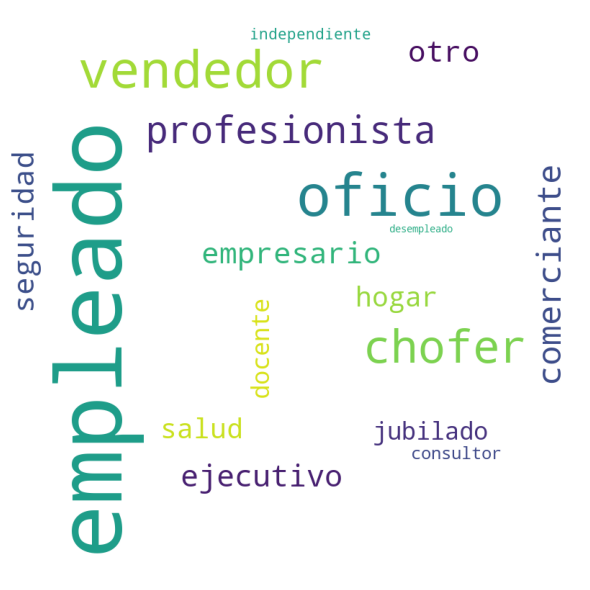

In [796]:
texto=''
for i in range(len(data.Empleos)):
    texto = texto + data.Empleos[i] + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 1).generate(texto)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Código para ejecución completa del Punto 1

In [220]:
import pandas as pd
import numpy as np
import string
import Levenshtein as lev

# Funciones

def Eliminar_Palabras(listaDePalabras, palabrasParaEliminar=palabrasPocoSignificado):
    for indice, palabra in enumerate(listaDePalabras):
        if palabra in palabrasParaEliminar:
            listaDePalabras.pop(indice)
            

def Clasificador_Empleo(listaPalabras, diccionarioGrupos=grupos, precision=3):
    for palabra in listaPalabras:
        for grupo in list(diccionarioGrupos.keys()):
            for elemento in diccionarioGrupos[grupo]:
                distancia=lev.distance(palabra,elemento)
                if distancia < precision:
                    return grupo
    return 'otro'

# Main
# 1. Carga de base datos
dataSource = "data/DataAnalyst_YoFio_PT_ocupaciones.csv"
data=pd.read_csv(dataSource)
# 2. Revisión de la consistencia de la base de datos
data=data.astype("string")
# 3. Normalización a minúsculas
data.Empleos=data.Empleos.apply(lambda x: x.lower())
# 4. Eliminación de puntuación y caracteres especiales
caracteresEspeciales=str.maketrans('áéíóú','aeiou',string.punctuation)
data.Empleos = data.Empleos.apply(lambda empleo: empleo.translate(caracteresEspeciales))
# 5. Separar por espacios
data.Empleos=data.Empleos.apply(str.split)
# 6. Eliminación de palabras con poco significado
preposiciones = ['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por', 'segun', 'sin', 'so', 'sobre', 'tras', 'durante', 'mediante', 'versus','via']
conjunciones = ['y', 'e', 'ni', 'que', 'pero', 'mas', 'aunque', 'sino', 'siquiera', 'o', 'u', 'ora', 'sea', 'bien']
otras = ['soy', 'una', 'uno','la', 'el', 'los']
palabrasPocoSignificado=preposiciones + conjunciones + otras
data.Empleos.apply(lambda empleos: Eliminar_Palabras(empleos));
# 7. Definición de grupos y reclasificación
grupos={'empleado': ['empleado','empleada','trabajador','obrero', 'tecnico', 'coordinador', 'operador', 'trabajo','supervisor',
                    'servidor', 'ayudante', 'auxiliar', 'mesero', 'promotor', 'despachador', 'demostrador',
                    'maniobrista','verificador','encargado','analista','sectretaria', 'montacarguista'
                    'instalador','oficina','fabrica','soporte','comisionista','montacarguista','maquilador','conserje',
                    'almacenista','telemarketer','telemarketing','callcenter','hoteleria','recepcionista',
                    'mantenimiento','intencencia','limpieza','aseo','reclutador','logistica','cuidador','reclutamiento',
                    'marketing','hostest','cafeteria','carpinteria','rosticeria','capturista','gasolinera','ajustador',
                    'autolavado','servicio','call','center','camarista','monirotista','aplicador','repartidor','paqueteria',
                    'cajero','mensajero','agente','checador','aseador','rh','rrhh','coordinacion'],
        'vendedor': ['vendedor', 'ventas', 'venta'], 
        'chofer':['chofer','uber', 'didi', 'taxi', 'taxsista', 'conductor','transportista','transporte','bicitaxi',
                 'trailero'],
        'salud': ['doctor','medico','enfermera','cirgujano','dentista','odontologo','camillero','radiologo',
                  'terapeuta','trasladista','clinico','preventista'],
        'comerciante':['comerciante','comercio', 'vendo'],
        'hogar':['hogar','ama', 'casa'],
        'oficio':['oficio','mecanico','electricista','albañil','vidriero','reposteria','carrocero','electrico', 'carnicero',
                 'hojalatero', 'cocinero', 'chef', 'zapatero','panadero','pizzero','estilista','maquillista',
                 'albañileria','herreria','tapicero','jardinero','costurero','sastre','construccion','repartidor',
                 'taller','pirotecnia','verdulero','estetica','fotografo','fotografia','manualidades','tatuador',
                 'reparacion','reparador','pastelero','repostero','afinador','banquetero','soldador','ebanista',
                 'entenador','automotriz','taquero'],
        'profesionista':['ingeniero', 'abogado','contador', 'licenciado','contabilidad', 'arquitecto', 'veterinario',
                        'metrologo','auditor','programador','contratista','mercadologo','profesionisnta','diseñador',
                        'diseño'],
        'ejecutivo':['ejecutivo','gerente', 'administrador', 'finanzas','jefe','administrativo','administracion'],
        'empresario':['empresario','tienda','negocio','locatario','empresa'],
        'seguridad':['seguridad', 'guardia', 'policia','custodia','vigilante','velador'],
        'jubilado':['jubilado', 'pensionado'],
        'independiente':['independiente','freelance','emprendedor'],
        'docente':['docente','profesor','maestro', 'instructor'],
        'consultor':['consultor', 'asesor'],
        'desempleado':['desempleado']
       }
data['EmpleoClasificado']=''
data.EmpleoClasificado=data.Empleos.apply(lambda empleo: Clasificador_Empleo(empleo))
data=data.drop(['Empleos'], axis =1)
data.rename(columns={'EmpleoClasificado':'Empleos'}, inplace=True)
# 8. Guardado de base de datos en un archivo
data.to_csv('data/Resultado_Clasificacion_ocupaciones.csv')


# Punto 3. Métricas a partir de los datos

In [751]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

### 1. Extracción de base datos

In [752]:
totalProcesos=4
dataProcesos=[]Extracción
for numeroProceso in range(totalProcesos):
    dataProcesos.append(pd.read_csv("data/proceso"+ str(numeroProceso + 1) +".csv"))

SyntaxError: invalid syntax (<ipython-input-752-3ab3d4f98118>, line 2)

### 2. Limpieza y Transformación

In [753]:
#Limpieza de datos nulos en campo address
dataProcesos[1].address=dataProcesos[1].address.apply(lambda x:'' if type(x)!=str else x)

#Validación Datos completos
#Registros con campos completos
listaRegistrosCompletos=list(dataProcesos[1][dataProcesos[1].address != ''].user_id)
#Validacion compra mayor a 40 pesos
#Registros con compraS iniciales mayores a 40 pesos
listaRegistrosMas40=list(dataProcesos[2][dataProcesos[2].tx1_amount>40].user_id)
#Combinacion de Validaciones
listaUsuariosValidos=[] #Contiene todos los user_id validos segun las restricciones dadas
for i in listaRegistrosCompletos:
    if i in listaRegistrosMas40:
        listaUsuariosValidos.append(i)
        
#Transformacion de srt a timestamp en las fechas de registro y eliminacion de la hora
dataProcesos[0].registration_date=dataProcesos[0].registration_date.apply(lambda x:
                                  datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

#Definicion del intervalo de tiempo
fechaInicial=dataProcesos[0].registration_date.min()
fechaFinal=dataProcesos[0].registration_date.max()
diasTotales=(fechaFinal-fechaInicial).days

TypeError: strptime() argument 1 must be str, not datetime.date

### 3. Cálculo del First Payment Default Rate por dia

In [754]:
firstPaymentDefaultRate=[]
for dia in range(diasTotales+1):
    #Generacion de listas de usuarios registrados en cada dia
    listaUsuariosHoy=list(dataProcesos[0][dataProcesos[0].registration_date == fechaInicial+timedelta(days=dia)].user_id)
    listaUsuariosHoy=list(set(listaUsuariosHoy)) #Eliminacion de duplicados en caso de haberlos (múltiples pagos)
    totalCuentas=len(listaUsuariosHoy)
    nCuentasImpago=0
    
    for iUsuario in range(len(listaUsuariosHoy)):
        #Extraccion de valores del proceso 3 (tx1_amount) de los usuarios validados
        tx1_amount =0.00
        numeroTx1=len(dataProcesos[2][dataProcesos[2].user_id==listaUsuariosHoy[iUsuario]].tx1_amount)
        for nTx1 in range(numeroTx1):
            tx1_amount=tx1_amount + float(dataProcesos[2][dataProcesos[2].user_id==listaUsuariosHoy[iUsuario]].tx1_amount)
     
        #Extraccion de valores del proceso 4(payment_amount) de los usuarios validados
        payment_amount=0.00
        numeroPagos=len(dataProcesos[3][dataProcesos[3].user_id==listaUsuariosHoy[iUsuario]].payment_amount)
        
        for nP in range(numeroPagos):
            payment_amount=payment_amount + float(dataProcesos[3][dataProcesos[3].user_id==listaUsuariosHoy[iUsuario]].payment_amount.iloc[nP])

        if tx1_amount-payment_amount>0:
            nCuentasImpago=+1
    
    firstPaymentDefaultRate.append([fechaInicial+timedelta(days=dia),totalCuentas,nCuentasImpago,(nCuentasImpago/totalCuentas)*100])
        

In [755]:
df_fPDR=pd.DataFrame(firstPaymentDefaultRate)
df_fPDR.rename(columns={0:'Fecha',1:'Total_de_cuentas',2:'Cuentas_en_impago',3:'Porcentaje_cuentas_impago'}, inplace=True)
#dffPDR.Fecha=dffPDR.Fecha.apply(lambda objFecha: objFecha.strftime("%Y-%m-%d")) #Transformar ojeto fecha a str
df_fPDR.Porcentaje_cuentas_impago=dffPDR.Porcentaje_cuentas_impago.apply(lambda porcentaje: round(porcentaje,2))
df_fPDR.to_csv('data/First_Payment_Default_Rate.csv')

In [756]:
import plotly.express as px

fig=px.bar(df_fPDR, x='Fecha',y='Total_de_cuentas',
               color_discrete_sequence=['blue'])
fig.add_scatter(x=df_fPDR.Fecha,y=dffPDR.Cuentas_en_impago, mode='markers', 
                marker_color='yellow', name= 'Cuentas en impago')

fig.show()


In [765]:
fig=px.bar(df_fPDR, x='Total_de_cuentas',y='Cuentas_en_impago')
fig.show()

In [764]:
fig=px.bar(df_fPDR, x='Cuentas_en_impago',y='Total_de_cuentas')
fig.show()

In [761]:
fig=px.bar(df_fPDR, x='Porcentaje_cuentas_impago',y='Porcentaje_cuentas_impago')
fig.show()

In [759]:
df_fPDR.describe()

,Total_de_cuentas,Cuentas_en_impago,Porcentaje_cuentas_impago
count,85.000000,85.000000,85.000000
mean,11.717647,0.964706,9.177647
std,3.737238,0.185617,4.526785
min,3.000000,0.000000,0.000000
25%,9.000000,1.000000,7.140000
50%,11.000000,1.000000,8.330000
75%,13.000000,1.000000,10.000000
max,25.000000,1.000000,33.330000
